In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from random import randint
from scipy.interpolate import make_interp_spline

In [2]:
fashion_mnist=keras.datasets.fashion_mnist
(x_Train,y_Train), (x_Test, y_Test) = fashion_mnist.load_data()

INDEX: 41709
LABEL: 1


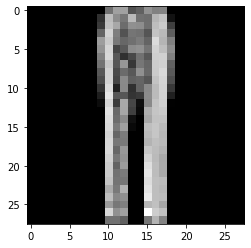

In [3]:
index=randint(0,len(x_Train)-1)
print(f'INDEX: {index}')
print(f'LABEL: {y_Train[index]}')
plt.imshow(x_Train[index],cmap='gray')

In [4]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(), 
                                    tf.keras.layers.Dense(1024, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

In [5]:
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [6]:
lossHistory=[]
accuracyHistory=[]

class MyCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        lossHistory.append(logs.get('loss'))
        accuracyHistory.append(logs.get('accuracy'))
        if round(logs.get('loss'),2)<=0.22:
            self.model.stop_training = True
            print("\nLoss is around 0.22 so stopping training!")

callback = MyCallback()

In [7]:
model.fit(x_Train/255,y_Train,epochs=20,callbacks=[callback])

Epoch 1/20
1875/1875 [==============================] - 7s 3ms/step - loss: 0.4734 - accuracy: 0.8296
Epoch 2/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3608 - accuracy: 0.8671
Epoch 3/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3213 - accuracy: 0.8821
Epoch 4/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2966 - accuracy: 0.8898
Epoch 5/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2799 - accuracy: 0.8960
Epoch 6/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2650 - accuracy: 0.9011
Epoch 7/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2498 - accuracy: 0.9067
Epoch 8/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2422 - accuracy: 0.9082
Epoch 9/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2288 - accuracy: 0.9137
Epoch 10/20
1858/1875 [============================>.] - ETA: 0s - loss: 0.2212 - 

In [8]:
model.evaluate(x_Test/255, y_Test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3253 - accuracy: 0.8907


[0.3252828121185303, 0.8906999826431274]

[  0. 100.   0.   0.   0.   0.   0.   0.   0.   0.]
1


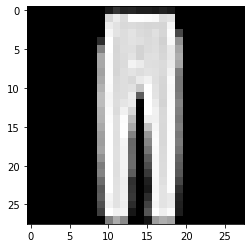

In [9]:
index=randint(0,len(x_Test)-1)
classifications = model.predict(x_Test)

print(np.around(classifications[index]*100,2))
print(y_Test[index])
plt.imshow(x_Test[index],cmap='gray')

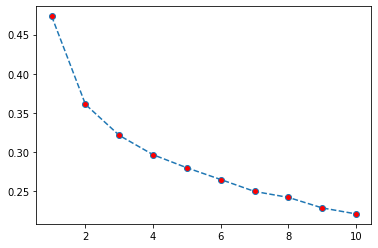

In [10]:
plt.plot([_ for _ in range(1,len(lossHistory)+1)],lossHistory,marker='o',linestyle='--',markerfacecolor='r')

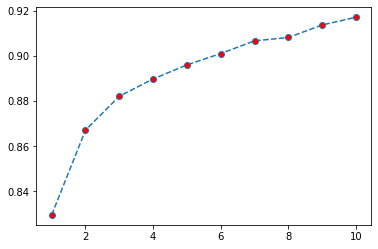

In [11]:
plt.plot([_ for _ in range(1,len(accuracyHistory)+1)],accuracyHistory,marker='o',linestyle='--',markerfacecolor='r')